In [1]:
from plot_signal_comparisons import *
from linear_regression import *
from ies_model_library import *

# Examples for using plotting functions 

### Plot all profits, capacity factors, and annual outputs for each system concept by LMP signal and hydrogen price
Use `plt_signal_comparisons()` with directory as one of the `market_results_xx` folders.  
Use the options PROFIT, CAPACITY, and OUTPUT to choose which plots you would like to generate.  
Select a `sort`, to sort by median LMP, bimodality coefficient, natural gas price, or chronologically  
Select a `relative_case` if you would like to plot the profits relative to the profits of one system  

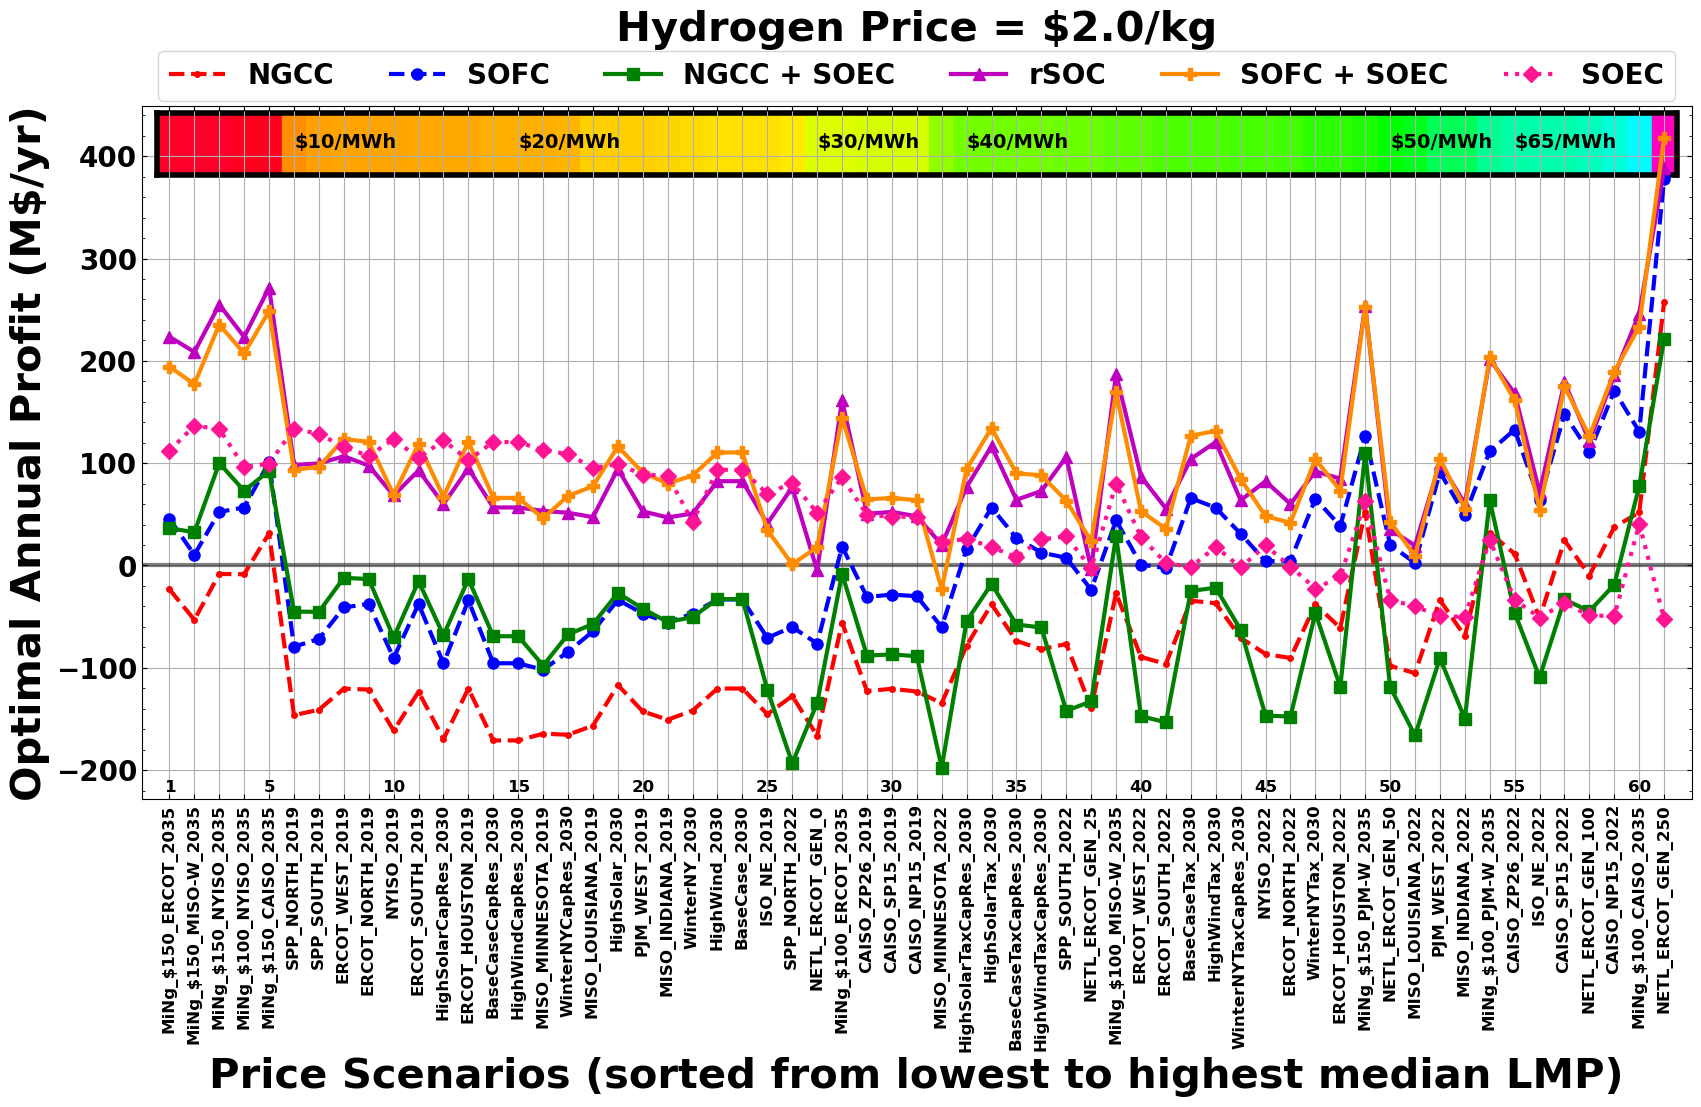

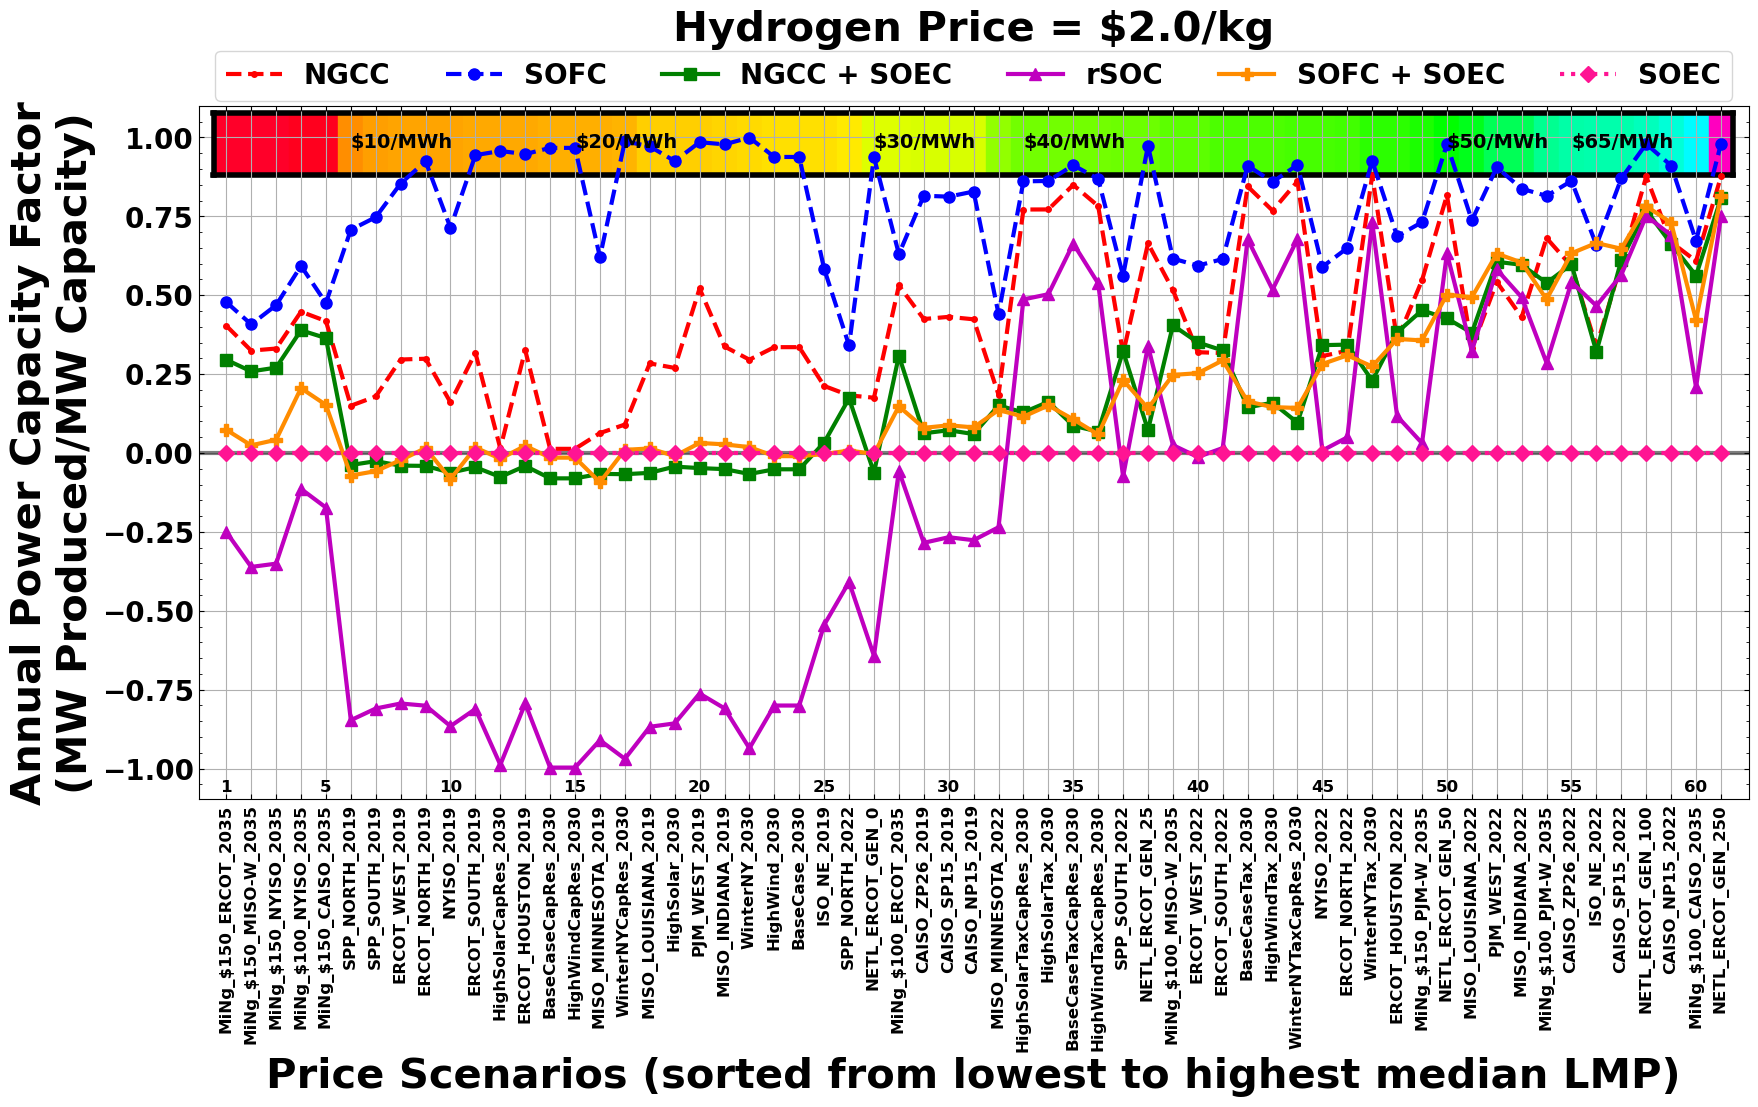

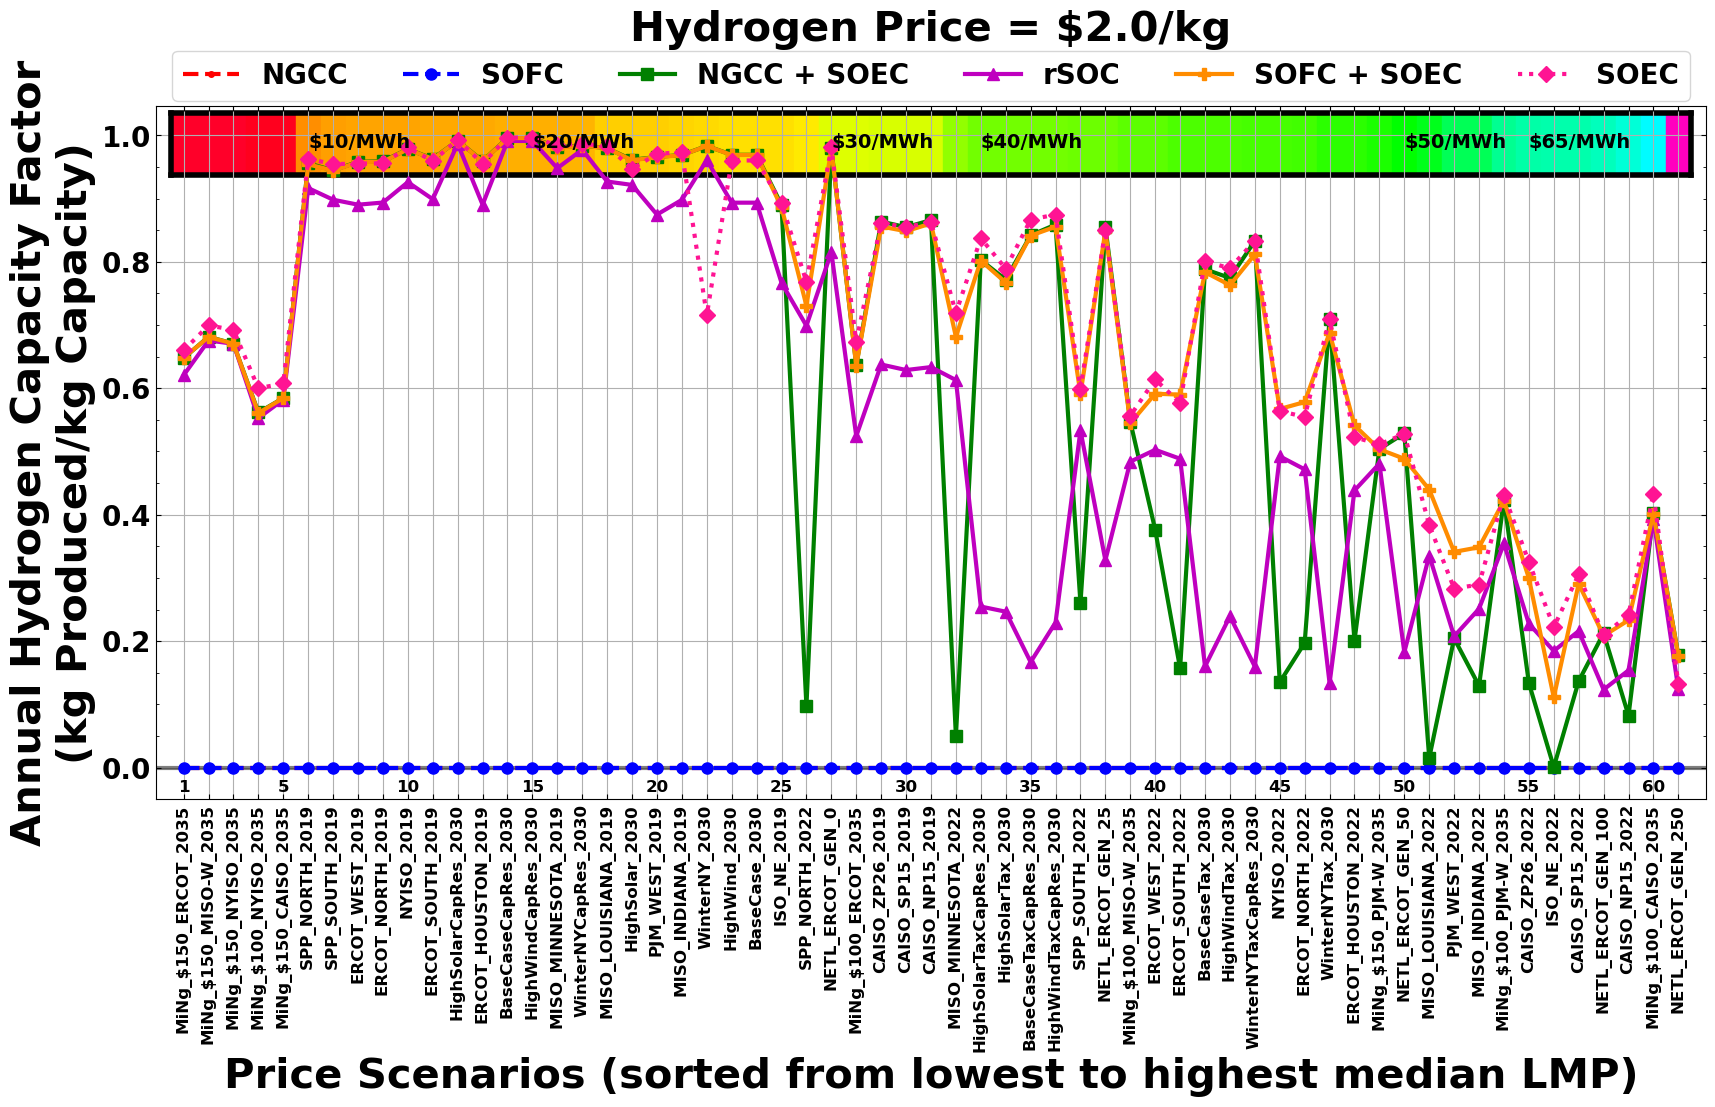

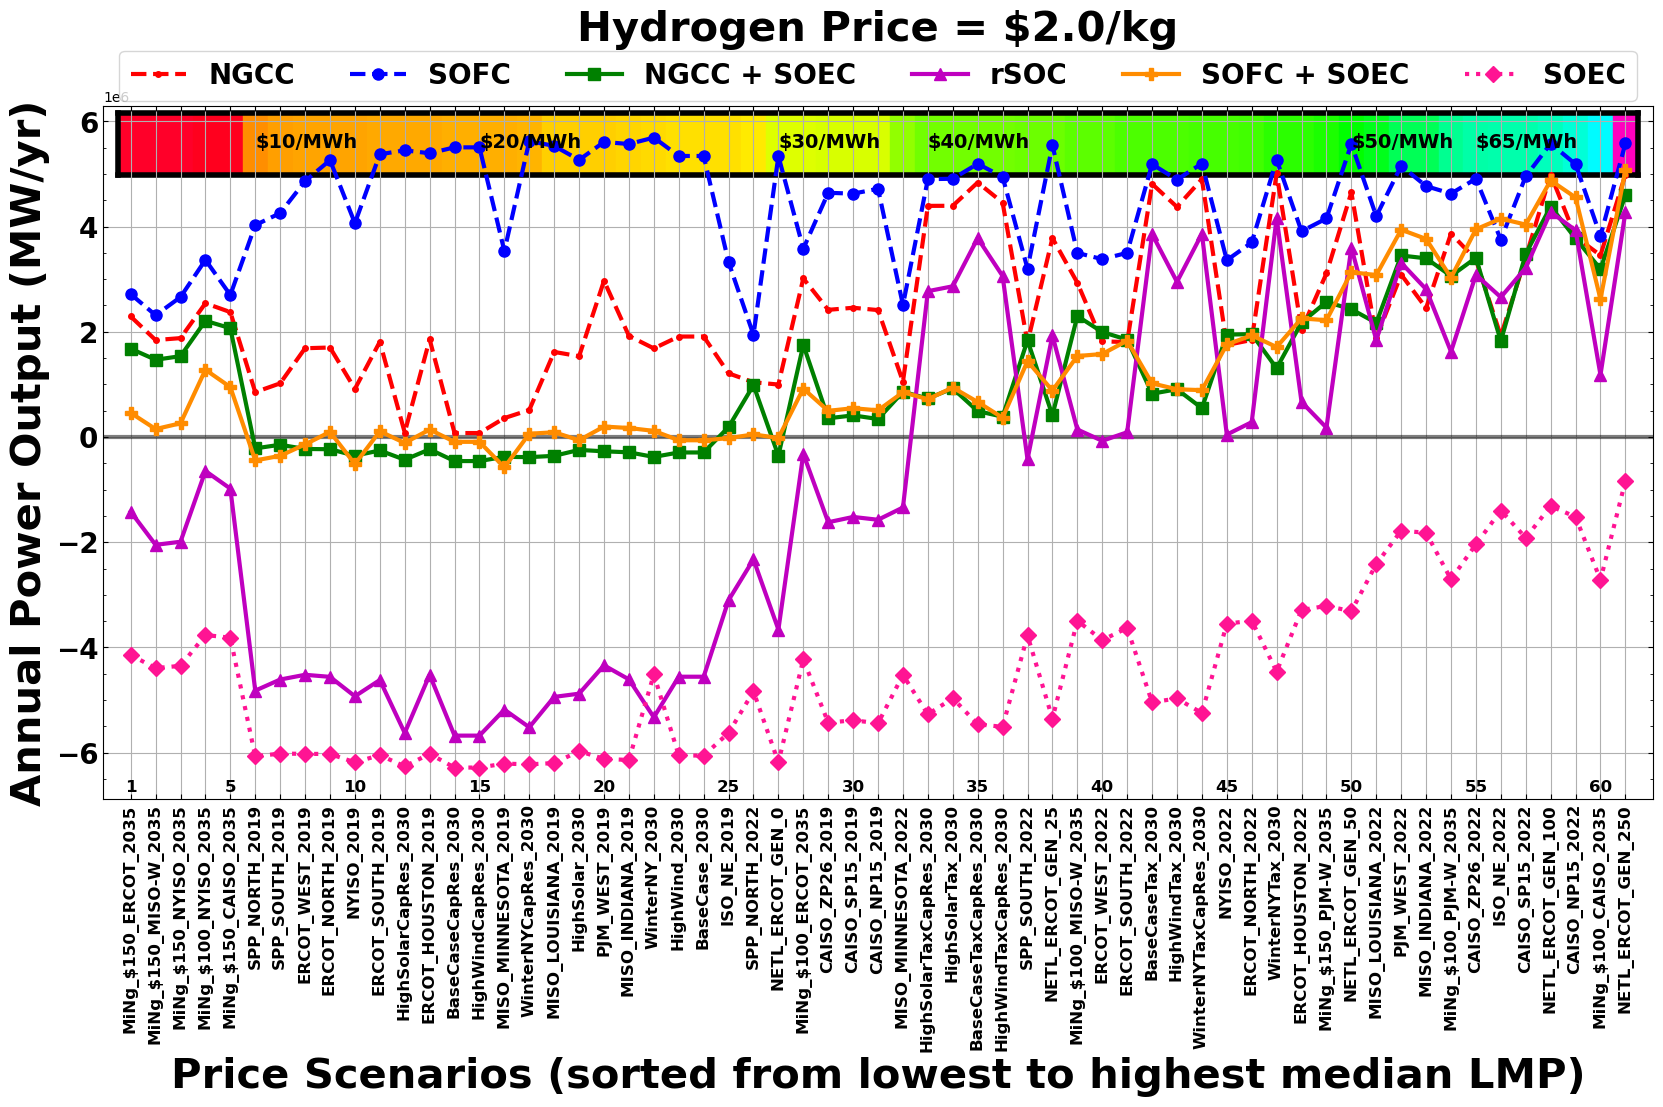

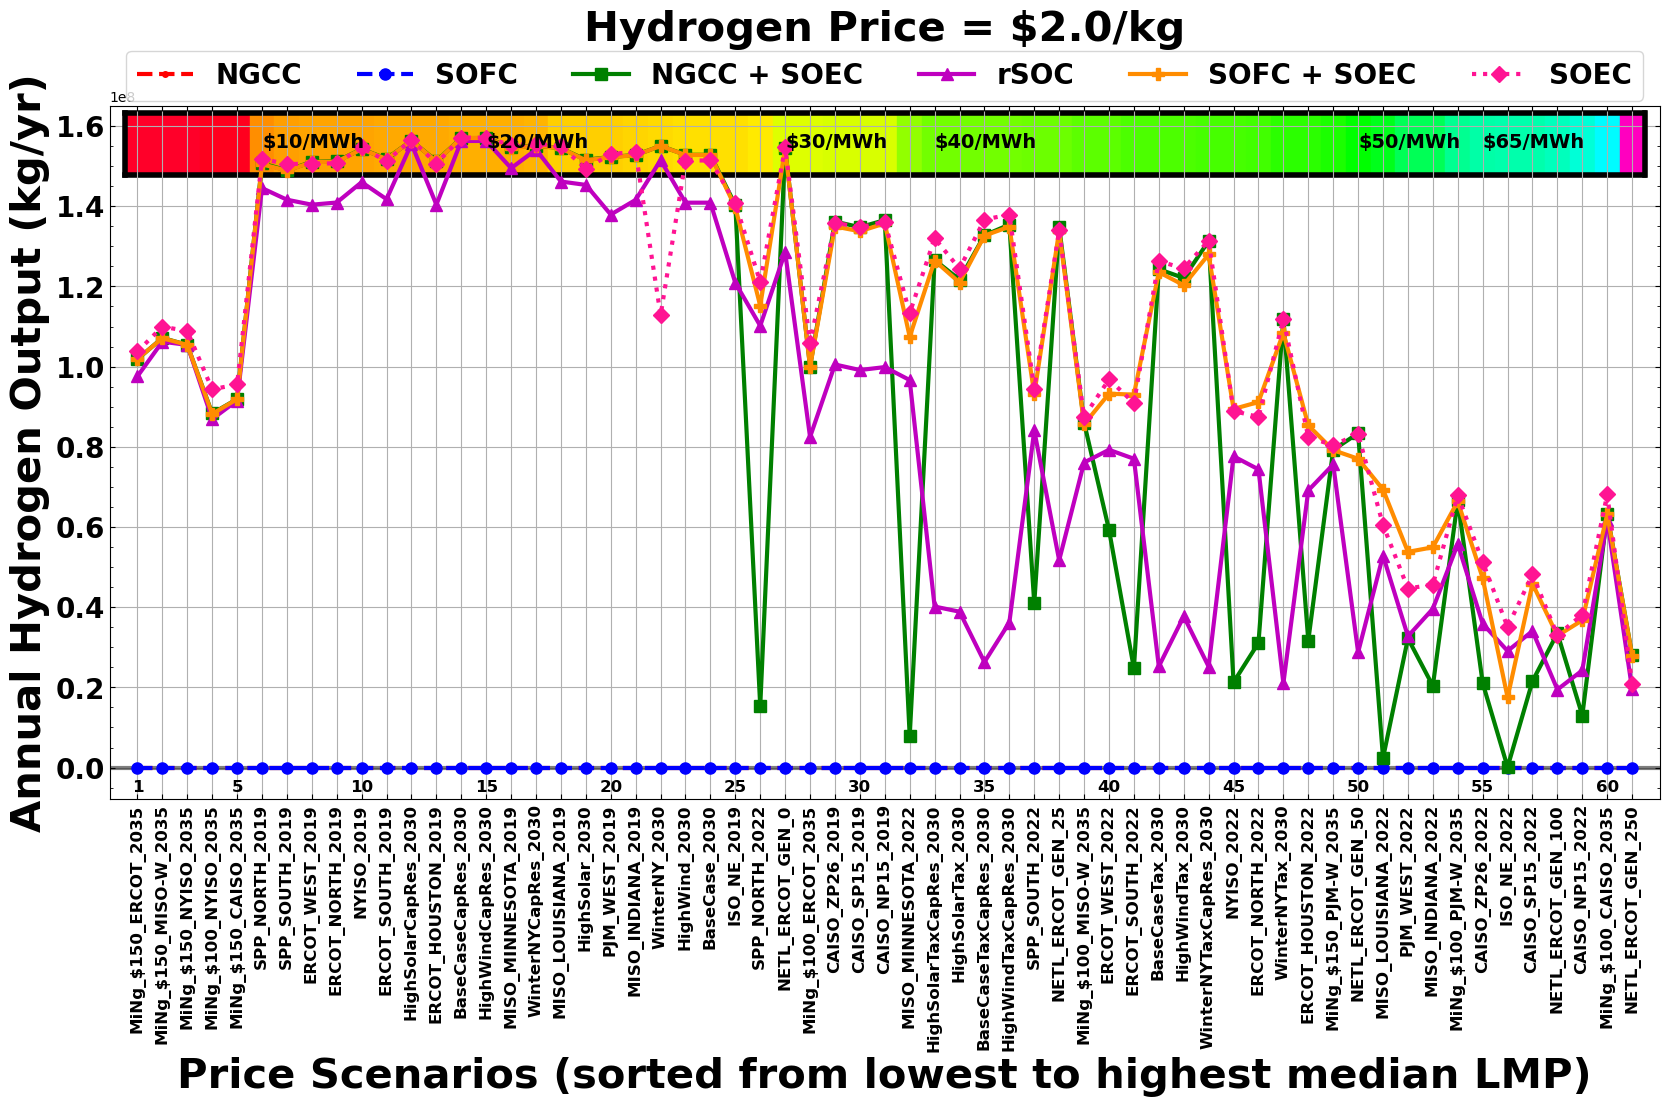

In [2]:
# plot signal comparison plots for $2.0/kg hydrogen 
plt_signal_comparison('../market_results_20', PROFIT = True, CAPACITY = True, OUTPUT = True, sort = 'median', relative_case = None)

### Plot annual profit scatter plots 

Use `plot_profit_scatter()` to plot scatter plots of system profits    
Use `x` and `y` options to select the x and y axis values from log$_{10}(p)$ of dip test statistic, natural gas price, and median LMP    
Use `side_by_side` option to plot positive and negative annual profits on different subplots

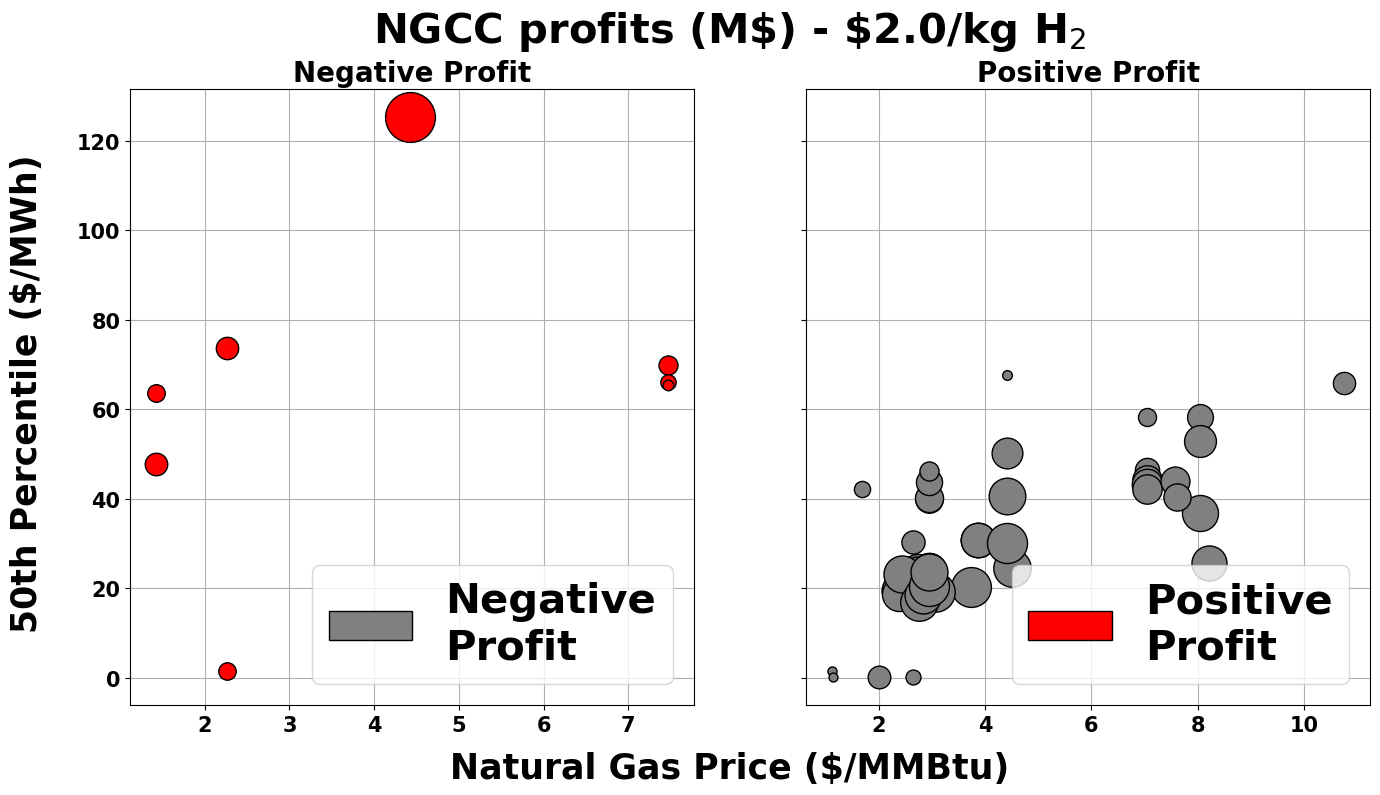

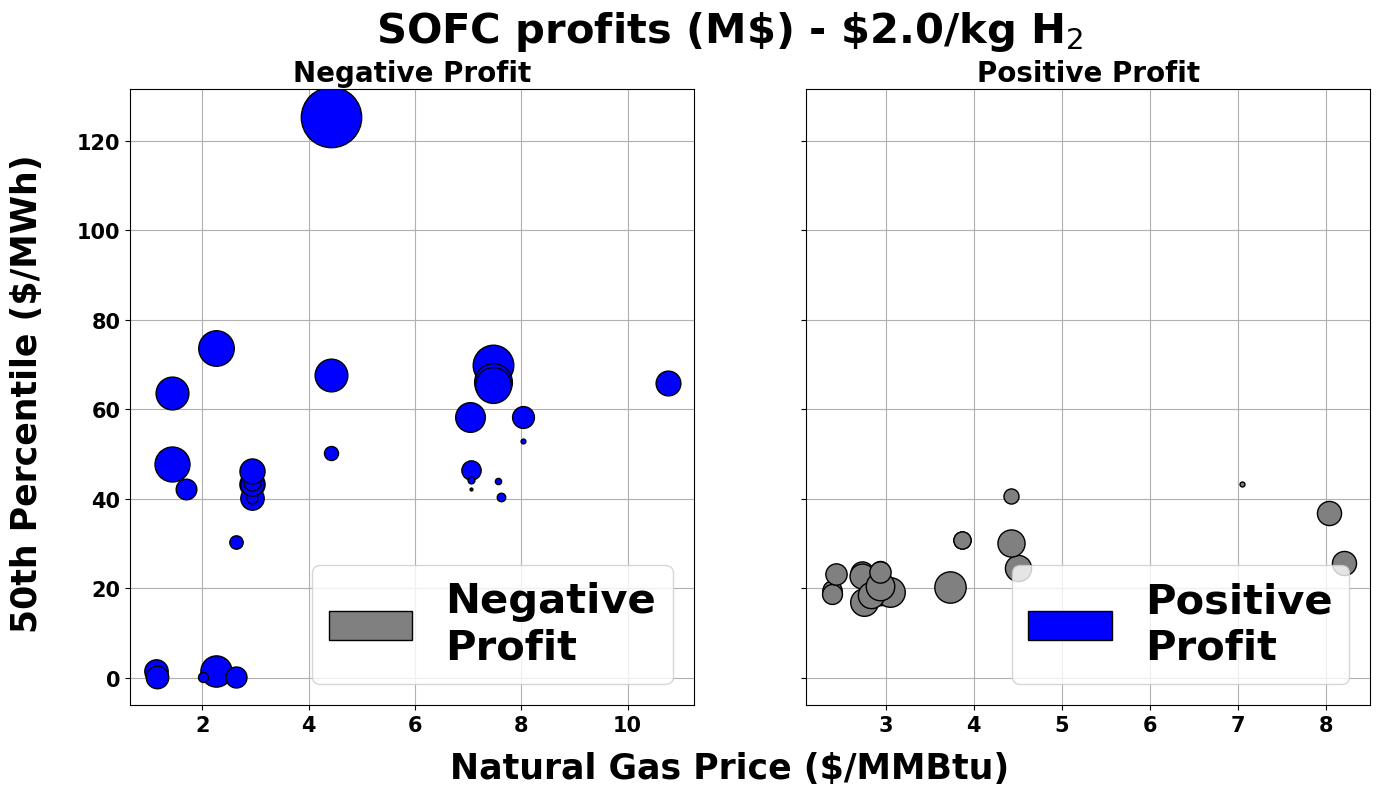

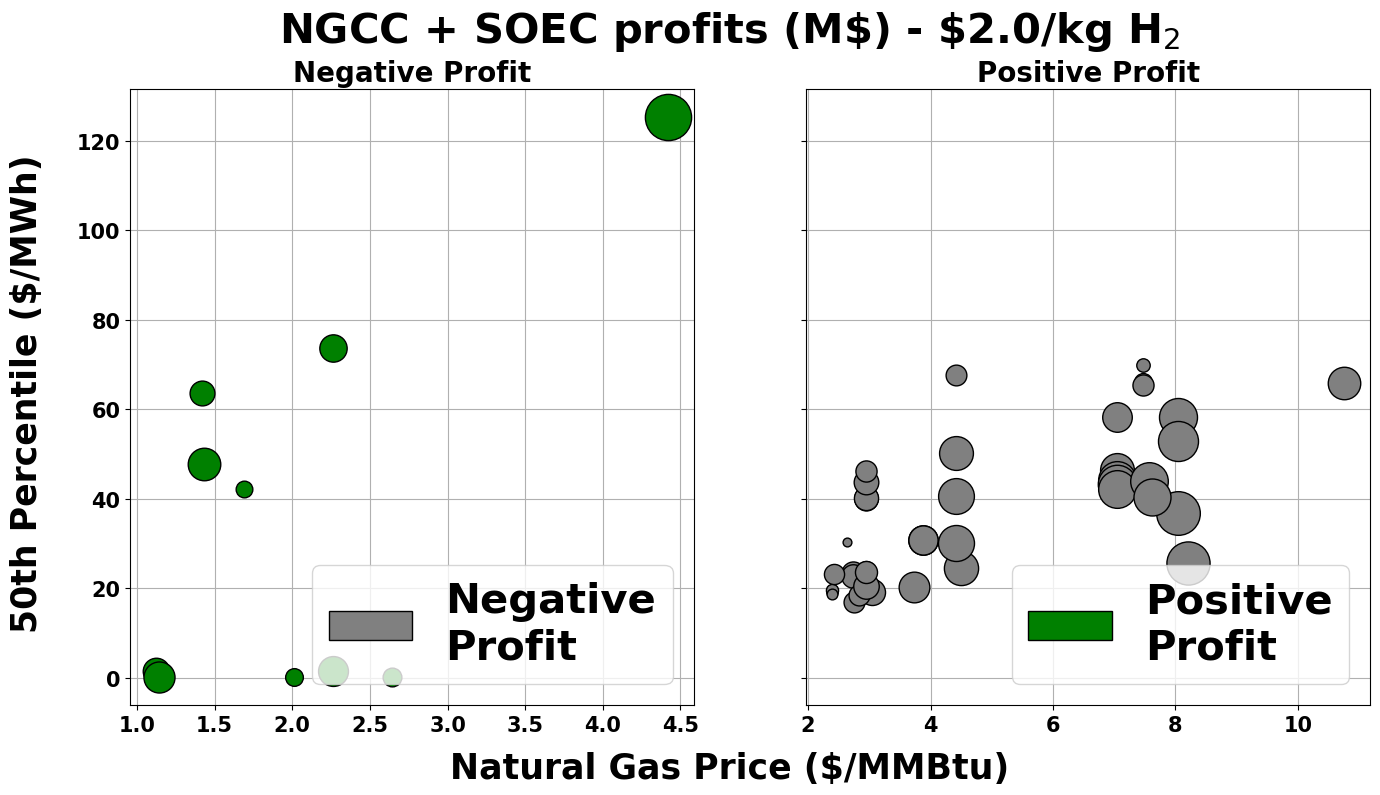

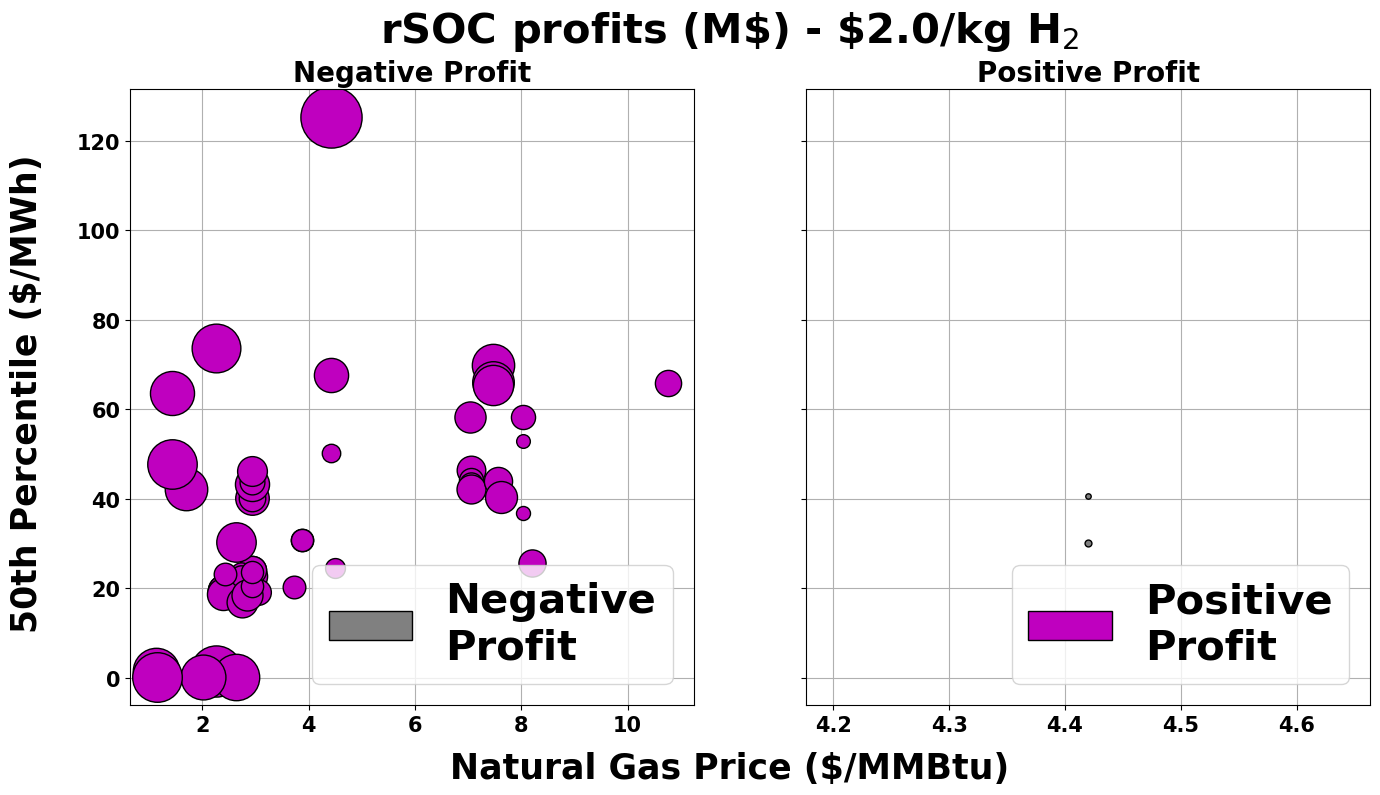

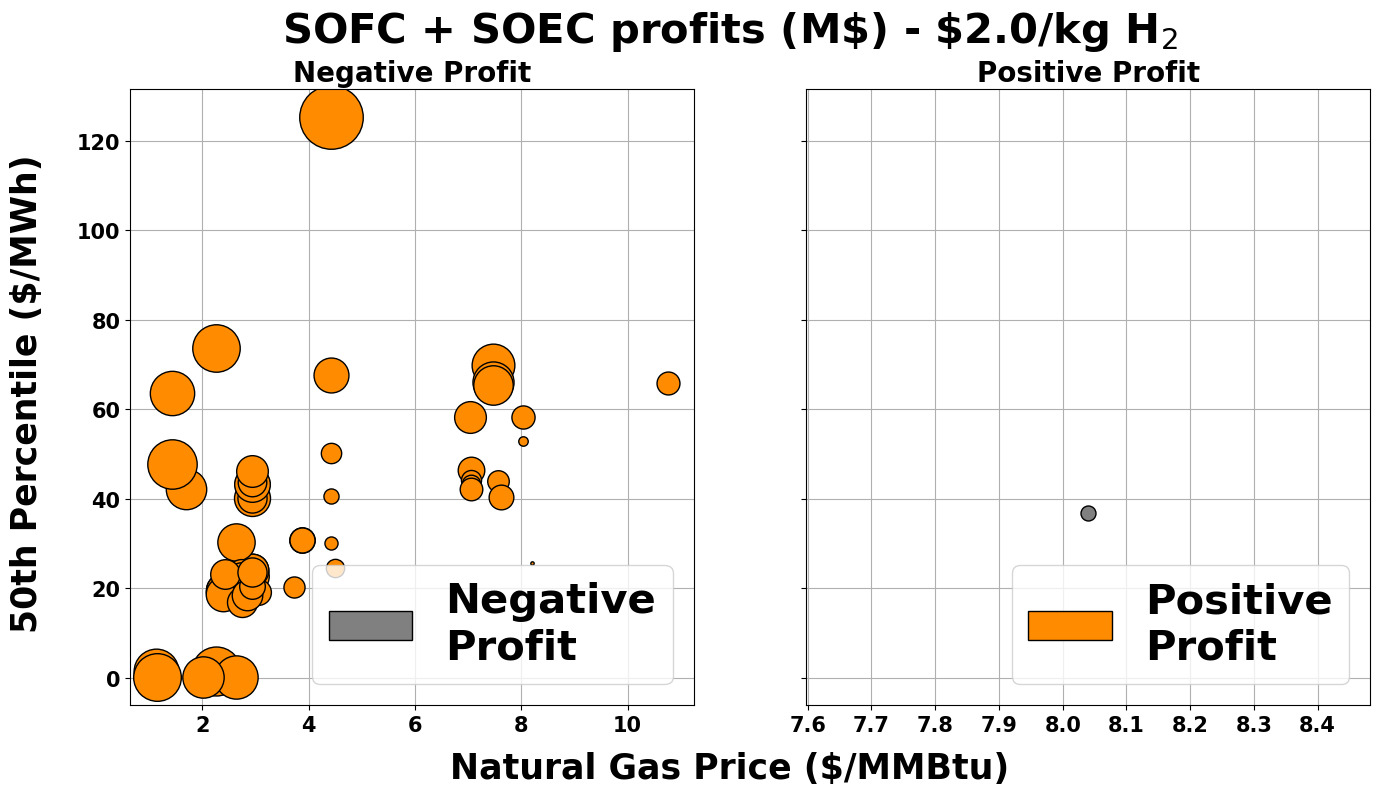

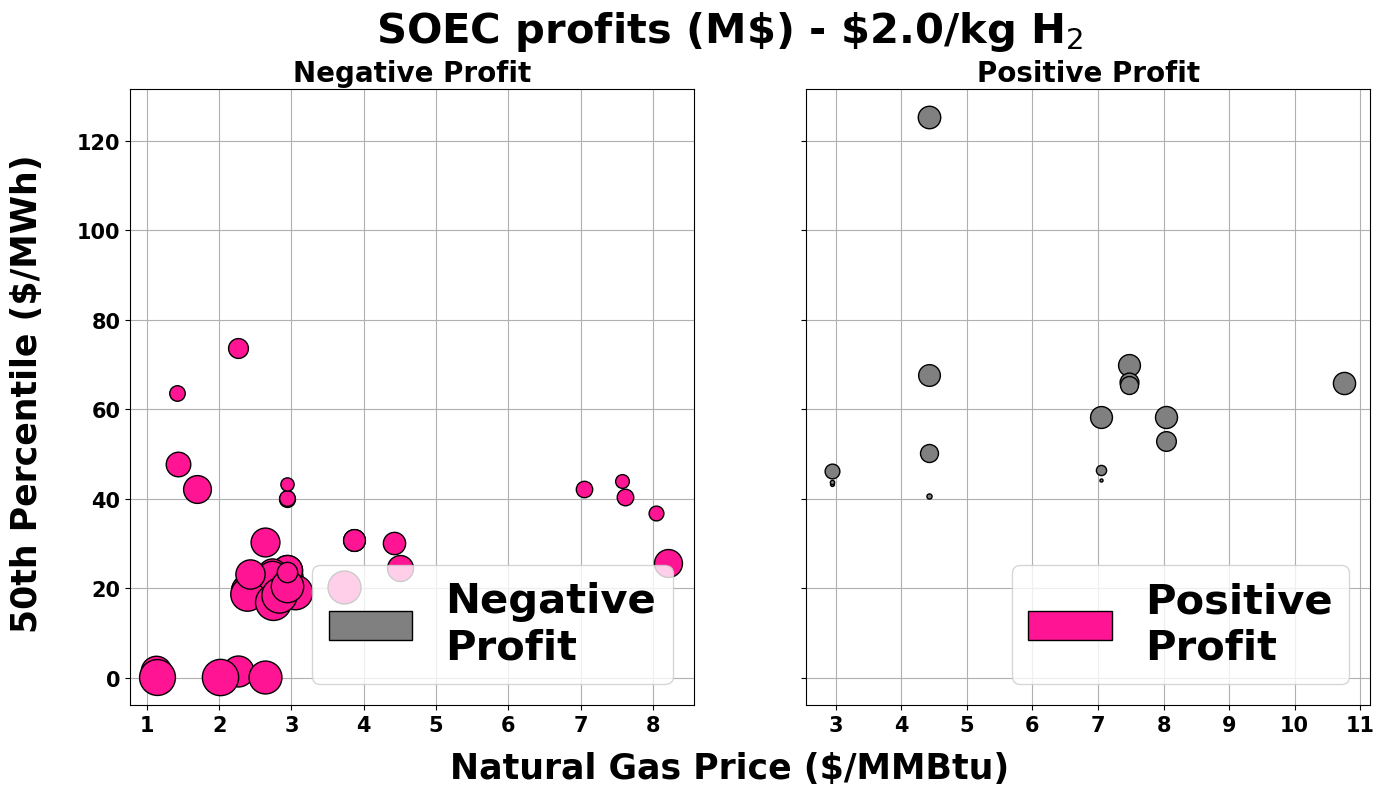

In [3]:
# plot side by side scatter plots of median LMP vs natural gas price 
plot_profit_scatter('../market_results_20', x = 'gasprice', y = 'medianlmp', side_by_side = True)

### Plot percentage of scenarios each case achieves positive profits at the optimal solution 

Use `plot_positiveprofit_barplot()` to plot a bar chart  
Use `h2_price` option to select the hydrogen price for the data. Selecting 0 will plot it across all prices

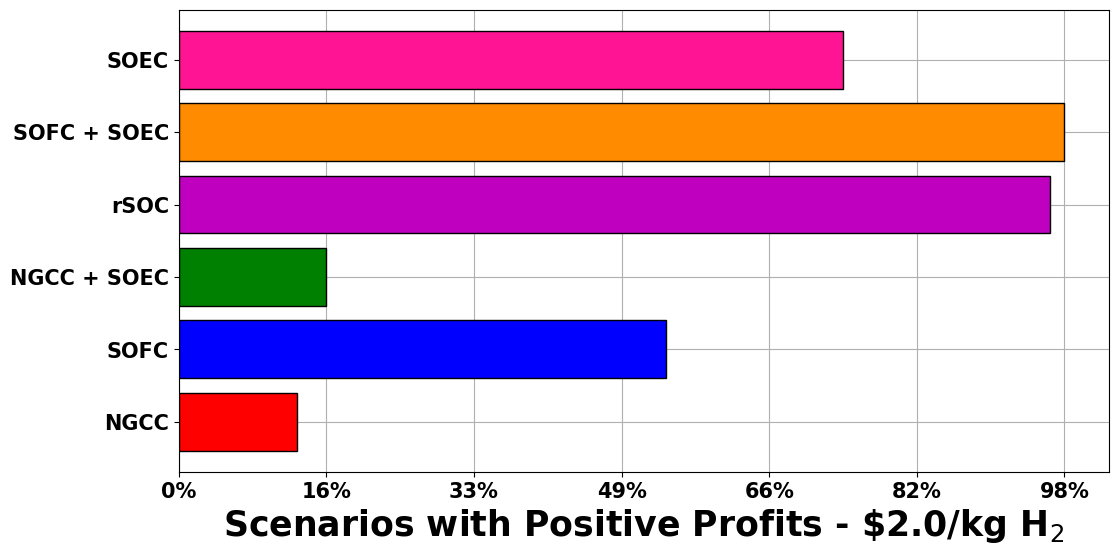

In [4]:
# plot bar chart of percentage of positive scenarios for hydrogen price of $2.0/kg
plot_positiveprofit_barplot(h2_price = 20)

### Plot a scatter plot of integrated vs. standalone case profits against bimodality metrics 

Use `plot_bimodalprofit_scatter()` to plot a scatter plot comparing integrated case profits with standalone system profits 
Choosing `technology = NGCC` will compare the NGCC + SOEC case with the standalone NGCC and SOEC   
Choosing `technology = SOFC` will compare the SOFC + SOEC case with the standalone SOFC and SOEC  
Use `h2_price` to select the hydrogen price of  data to be plotted. Selecting 0 will plot it across all prices.   

c:\Users\Nicole's PC\OneDrive\Documents\DowlingLab\publications\cortes_et_al_2023\plots\plot_signal_comparisons.py:764: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(ymin = 0.0, ymax = 1.0)


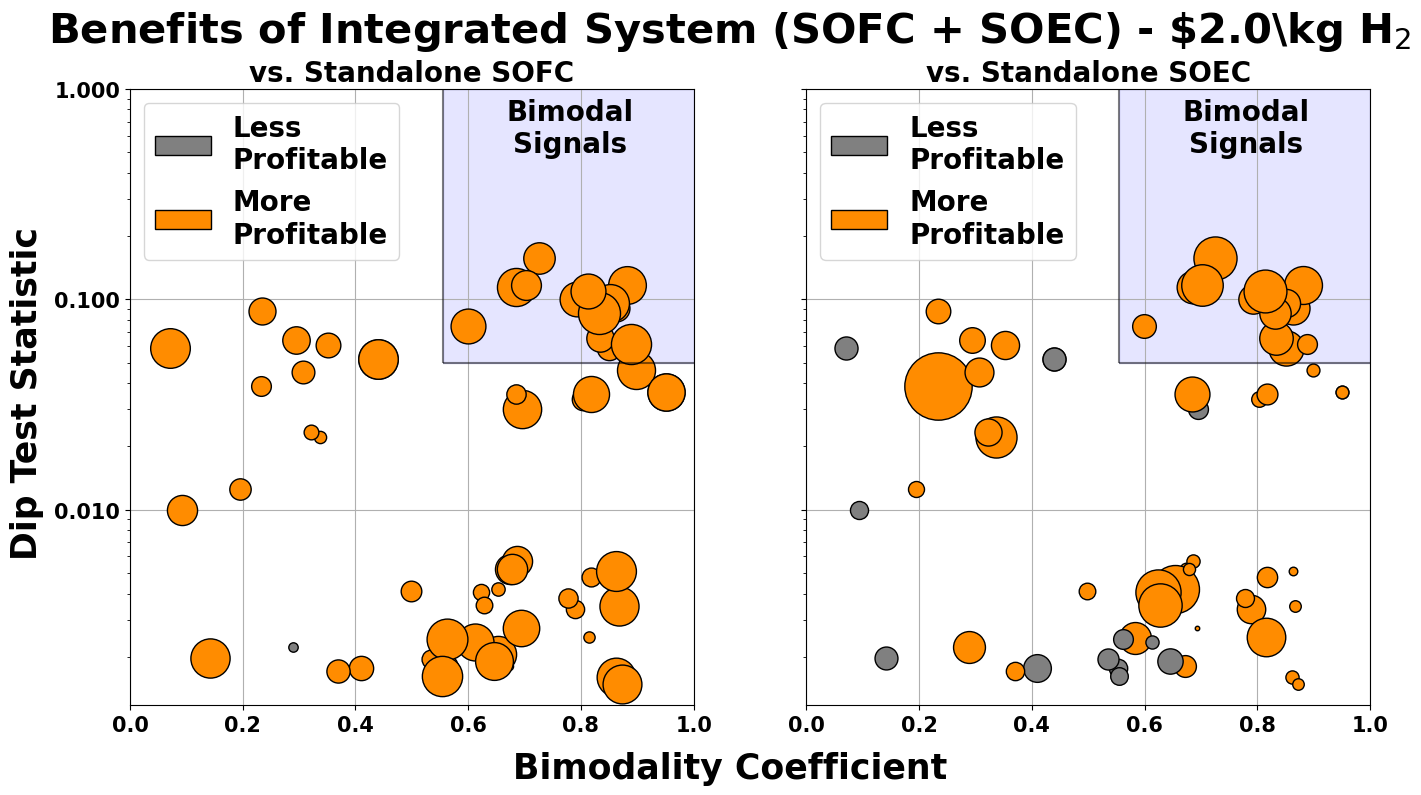

In [5]:
# plot SOFC comparison under nominal hydrogen price of $2/kg
plot_bimodalprofit_scatter(h2_price = 20)

### Plot marginal cost of system 

Start be creating a case object in the form `CaseX()`  
Then, use `CaseX.plot_marginal_cost()` to return a plot of the marginal cost

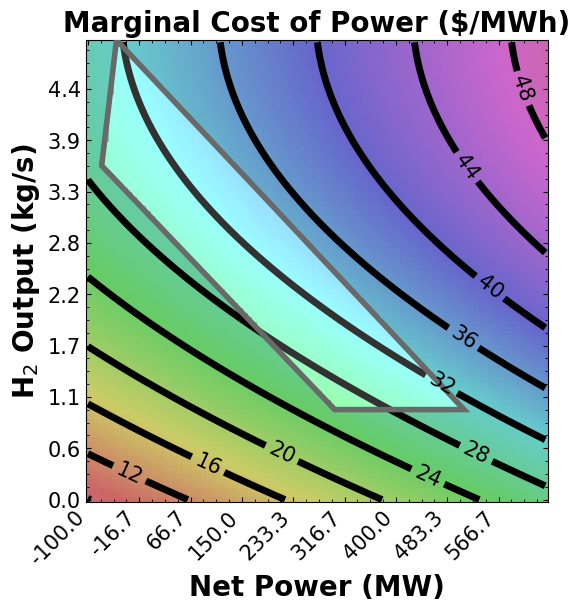

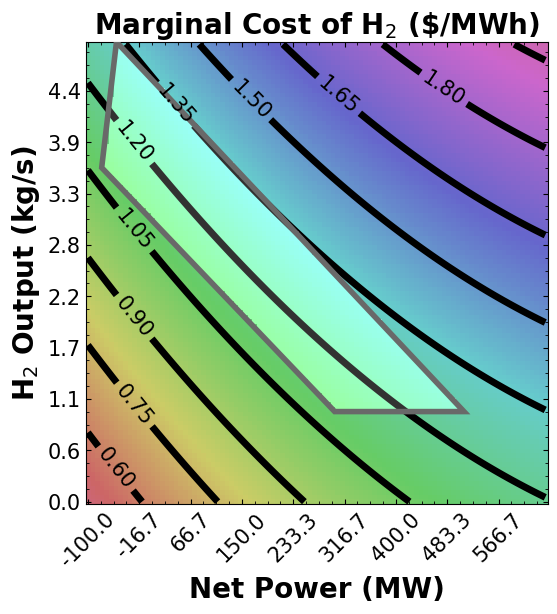

In [6]:
# generate a marginal cost plot for case 3 - NGCC + SOEC
case3 = Case3()
case3.plot_marginal_cost()

## Linear Regresson and Associated Plots

### Perform linear regression 

Use `perform_regression_full()` to perform the linear regression exactly as it was done for the publication  

In [7]:
# perform linear regression 
results = perform_regression_full()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1367.
Date:                Fri, 28 Apr 2023   Prob (F-statistic):          2.22e-255
Time:                        10:01:19   Log-Likelihood:                 349.62
No. Observations:                 305   AIC:                            -669.2
Df Residuals:                     290   BIC:                            -613.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### Return a table of coefficients 

Use `return_coefficient_table()` to return a formatted `pd.DataFrame` of the regressions coefficients, intercepts, and R$^2$ values.   
*'s denote a statistically significant coefficient

In [8]:
# return table of coefficients 
coef_table = return_coefficient_table(results)
coef_table

NGCC    SOFC NGCC+SOEC    rSOC SOFC+SOEC  \
Natural Gas Price ($/MMBtu)  -0.18*  -0.26*     -0.6*  -0.26*    -0.51*   
Carbon Tax ($/tonne)          0.33*    0.2*      0.3*   0.46*      0.3*   
Hydrogen Price ($/kg)           0.0     0.0     0.59*   0.51*     0.63*   
Mean LMP ($/MWh)              0.89*   0.88*     1.12*   1.14*     1.07*   
Minimum LMP ($/MWh)           -0.01     0.0     -0.03   -0.02     -0.02   
25th Percentile ($/MWh)      -0.28*  -0.14*    -0.38*  -0.58*    -0.36*   
50th Percentile ($/MWh)         0.0    0.01    -0.15*  -0.13*     -0.11   
75th Percentile ($/MWh)      -0.28*  -0.15*    -0.43*  -0.47*    -0.35*   
Maximum LMP ($/MWh)          -0.18*  -0.17*     -0.17  -0.37*     -0.3*   
Standard Deviation ($/MWh)    0.18*   0.17*      0.16   0.36*      0.3*   
Skewness                      0.05*   0.05*     -0.02   -0.02     -0.02   
Kurtosis                      0.03*   0.03*      0.08   0.14*     0.12*   
Bimodality Coefficient       -0.06*  -0.05*     -0.05  -0.11*    -0.09*   
Dip Test Statistic            0.03*   0.03*     -0.07  -0.11*     -0.1*   
Intercept                     -0.9*  -0.16*    -0.57*   0.68*     0.72*   
Rsq                            0.99    0.99      0.88    0.88      0.92   

                               SOEC  
Natural Gas Price ($/MMBtu)   -0.04  
Carbon Tax ($/tonne)           0.2*  
Hydrogen Price ($/kg)         0.64*  
Mean LMP ($/MWh)               0.07  
Minimum LMP ($/MWh)           -0.02  
25th Percentile ($/MWh)      -0.29*  
50th Percentile ($/MWh)       -0.11  
75th Percentile ($/MWh)       -0.27  
Maximum LMP ($/MWh)           -0.18  
Standard Deviation ($/MWh)    0.19*  
Skewness                      -0.06  
Kurtosis                      0.09*  
Bimodality Coefficient        -0.05  
Dip Test Statistic           -0.14*  
Intercept                     0.23*  
Rsq                             0.9

### Plot parity plots 

Use `plot_parityplots()` to plot all six linear regression cases parity between regressions results and rigorous optimization.  

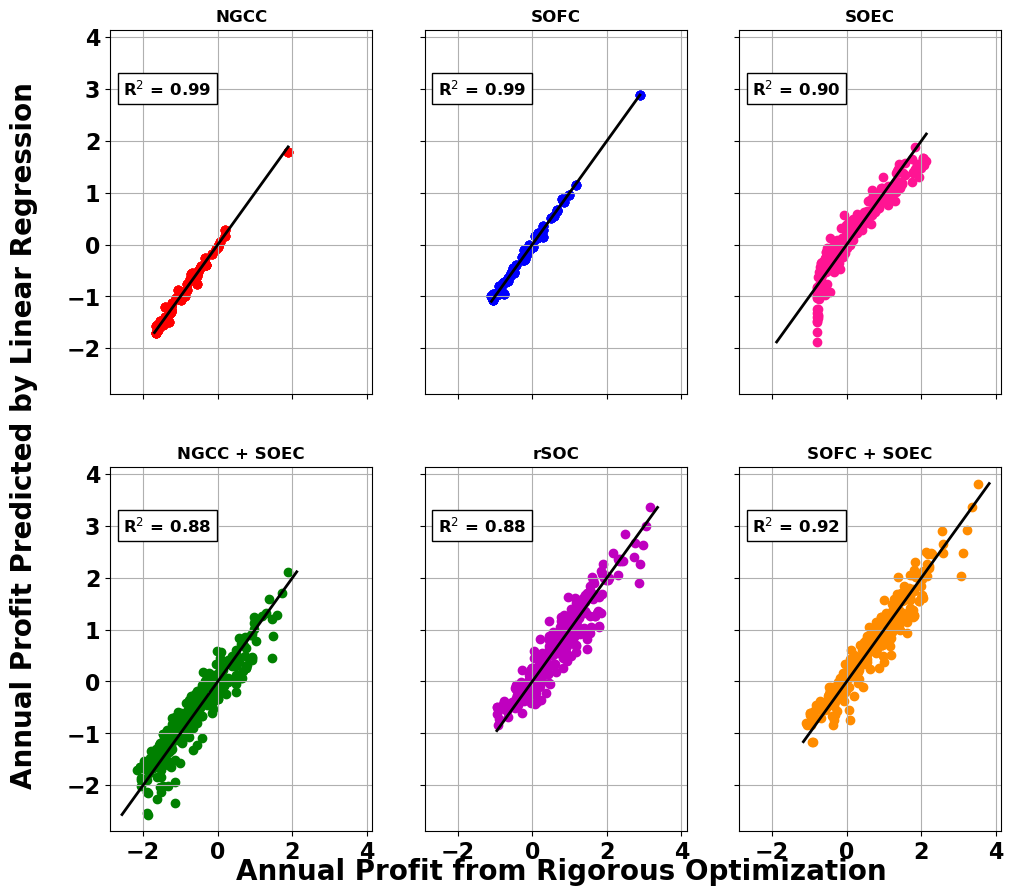

In [9]:
# generate parity plots 
plot_parityplots(results)

### Plot feature correlation

Use `plot_featurecorrelation()` to return a plot and `pd.DataFrame` of correlation coefficients for features of linear regression

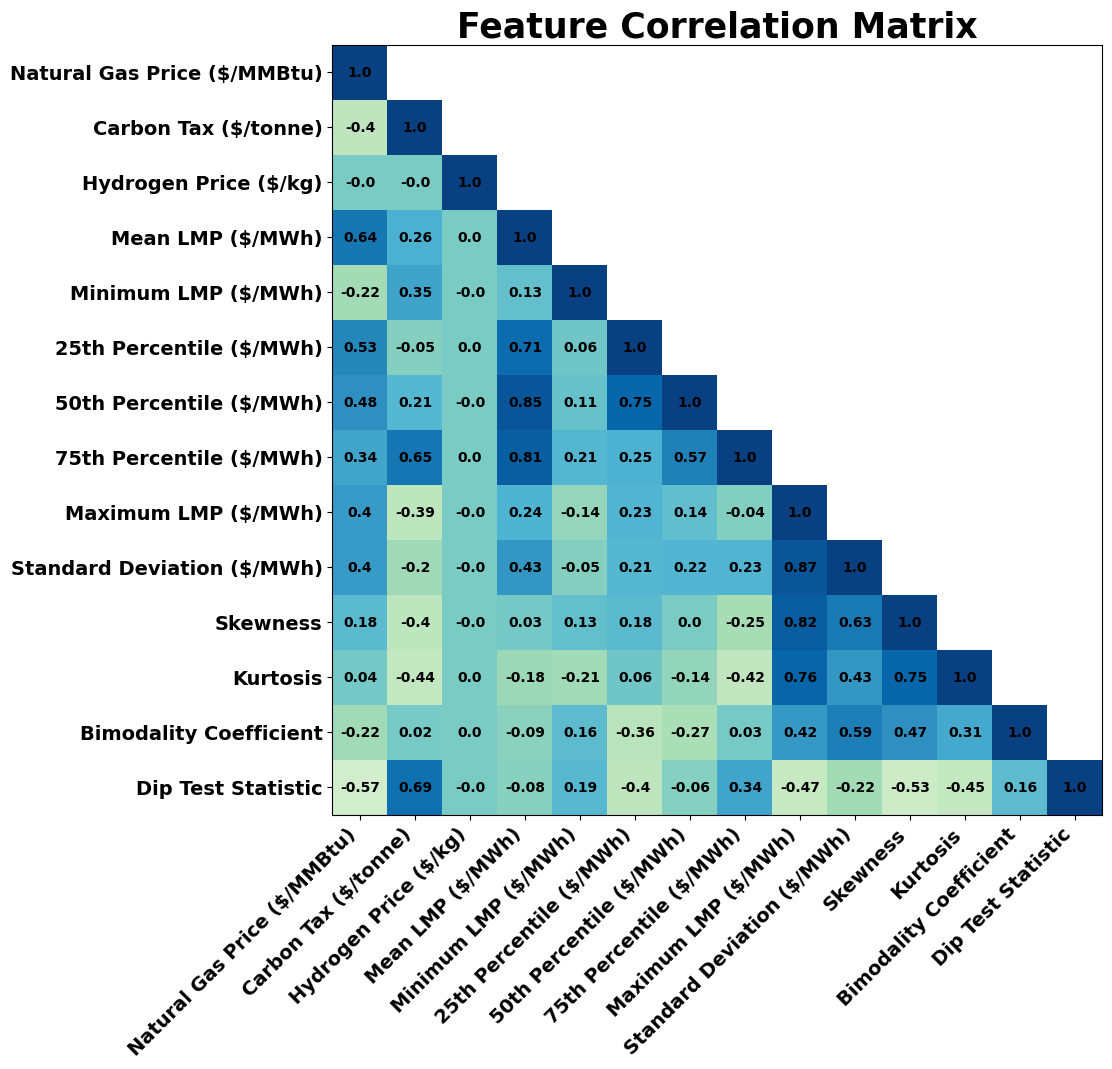

0             1             2         3         4         5   \
0   1.000000e+00           NaN           NaN       NaN       NaN       NaN   
1  -4.009425e-01  1.000000e+00           NaN       NaN       NaN       NaN   
2  -6.188128e-18 -7.280151e-18  1.000000e+00       NaN       NaN       NaN   
3   6.386812e-01  2.595136e-01  6.552136e-18  1.000000       NaN       NaN   
4  -2.239589e-01  3.475967e-01 -1.747236e-17  0.131220  1.000000       NaN   
5   5.258434e-01 -5.035403e-02  1.501531e-17  0.711525  0.060264  1.000000   
6   4.765596e-01  2.099132e-01 -6.188128e-18  0.854331  0.106770  0.752973   
7   3.421050e-01  6.455838e-01  1.019221e-17  0.810360  0.214235  0.251237   
8   4.037281e-01 -3.923222e-01 -2.184045e-17  0.239420 -0.141758  0.229376   
9   4.048689e-01 -1.980584e-01 -3.640075e-19  0.433502 -0.048833  0.206180   
10  1.762633e-01 -3.955268e-01 -4.368091e-17  0.032513  0.132315  0.177102   
11  3.703334e-02 -4.387890e-01  1.456030e-18 -0.184695 -0.209737  0.058066   
12 -2.175826e-01  2.113258e-02  2.111244e-17 -0.089732  0.159628 -0.363455   
13 -5.667635e-01  6.898328e-01 -1.417354e-17 -0.080554  0.193705 -0.402424   

          6         7         8         9         10        11        12   13  
0        NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN  
1        NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN  
2        NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN  
3        NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN  
4        NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN  
5        NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN  
6   1.000000       NaN       NaN       NaN       NaN       NaN       NaN  NaN  
7   0.574250  1.000000       NaN       NaN       NaN       NaN       NaN  NaN  
8   0.135356 -0.043778  1.000000       NaN       NaN       NaN       NaN  NaN  
9   0.219182  0.232761  0.867141  1.000000       NaN       NaN       NaN  NaN  
10  0.003714 -0.247748  0.818980  0.625603  1.000000       NaN       NaN  NaN  
11 -0.138934 -0.424474  0.761907  0.430251  0.753324  1.000000       NaN  NaN  
12 -0.266425  0.026033  0.421143  0.588733  0.470979  0.309709  1.000000  NaN  
13 -0.055596  0.341601 -0.466848 -0.220779 -0.530731 -0.452390  0.162584  1.0

In [10]:
# plot feature correlation 
plot_featurecorrelation(results)